<img src='../Logo.png' /></a>

# Logistic regression
Good introduction to Classification problems

## Resources:

[Logistic Regression Tutorial for Machine Learning](http://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)

[Logistic Regression for Machine Learning](http://machinelearningmastery.com/logistic-regression-for-machine-learning/)

[How To Implement Logistic Regression With Stochastic Gradient Descent From Scratch With Python](http://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/)

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.

## Description

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **Sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

## Logistic regression intuition

<img src='img/logistic-reg.png' width=430 align=left>

<img src='img/logistic-reg-model.png' width=430 align=left>

<img src='img/logistic-reg-prediction.png' width=430 align=left>

---

## Illustration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

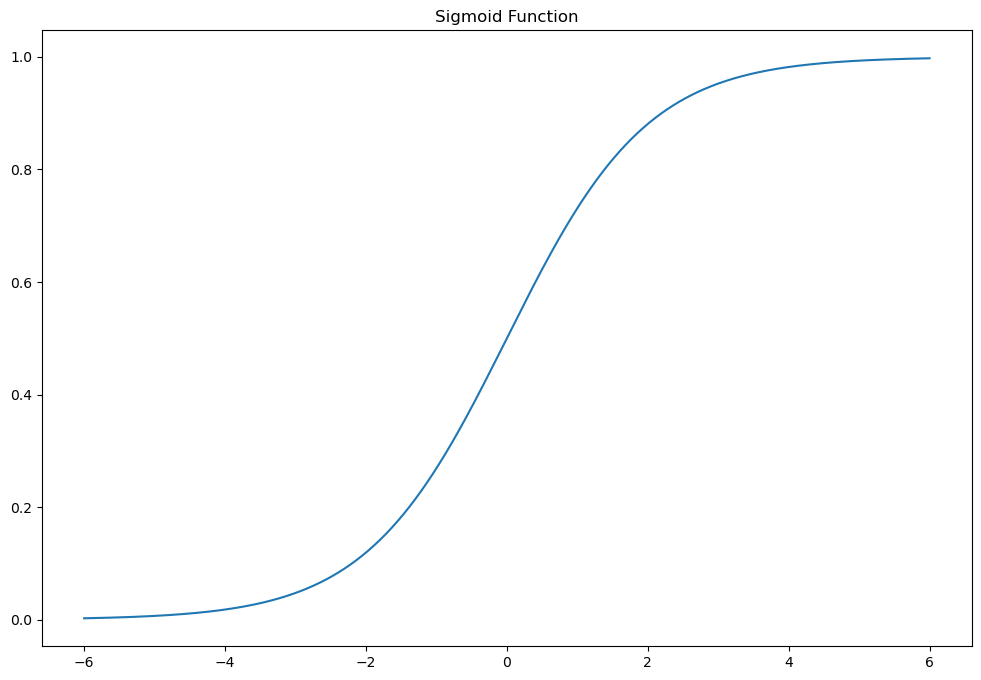

In [2]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function");

The logistic regression equation has a very simiar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [3]:
tmp = [0, 0.4, 0.6, 0.8, 1.0]
tmp

[0, 0.4, 0.6, 0.8, 1.0]

In [4]:
np.round(tmp)

array([0., 0., 1., 1., 1.])

In [5]:
np.array(tmp) > 0.7

array([False, False, False,  True,  True])

# Making Predictions with Logistic Regression

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_i}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_i$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [6]:
dataset = [[-2.0011, 0],
           [-1.4654, 0],
           [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.6754, 1],
           [7.6737, 1]]

Let's say you have been provided with the coefficient

In [7]:
coef = [-0.806605464, 0.2573316]

In [8]:
for row in dataset:
    yhat = 1.0 / (1.0 + np.exp(- coef[0] - coef[1] * row[0]))
    print("yhat {0:.4f}, yhat {1}".format(yhat, round(yhat)))

yhat 0.2106, yhat 0
yhat 0.2344, yhat 0
yhat 0.3139, yhat 0
yhat 0.3895, yhat 0
yhat 0.4955, yhat 0
yhat 0.7606, yhat 1
yhat 0.6377, yhat 1
yhat 0.7261, yhat 1
yhat 0.8063, yhat 1
yhat 0.7628, yhat 1


# Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data (e.g. probability of 1 if the data is the primary class).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

# Learning with Stochastic Gradient Descent

Logistic Regression uses gradient descent to update the coefficients.

Each gradient descent iteration, the coefficients are updated using the equation:

$$\beta=\beta+\textrm{learning rate}\times (y-\hat{y}) \times \hat{y} \times (1-\hat{y}) \times x $$


# Using Scikit Learn to Estimate Coefficients

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.6754, 1],
 [7.6737, 1]]

In [11]:
X = np.array(dataset)[:, 0:1]
y = np.array(dataset)[:, 1]

In [12]:
X

array([[-2.0011],
       [-1.4654],
       [ 0.0965],
       [ 1.3881],
       [ 3.0641],
       [ 7.6275],
       [ 5.3324],
       [ 6.9225],
       [ 8.6754],
       [ 7.6737]])

In [13]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [14]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [15]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)

In [16]:
clf_LR.fit(X,y)

LogisticRegression()

In [17]:
clf_LR.predict(X)

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [18]:
type(X), X.shape

(numpy.ndarray, (10, 1))

In [19]:
clf_LR.predict(np.array([8.02]).reshape(-1,1))

array([1.])

In [20]:
clf_LR.predict_proba(X)

array([[0.99853453, 0.00146547],
       [0.99740804, 0.00259196],
       [0.98643844, 0.01356156],
       [0.94830288, 0.05169712],
       [0.75430207, 0.24569793],
       [0.02307807, 0.97692193],
       [0.21456501, 0.78543499],
       [0.04771639, 0.95228361],
       [0.00766657, 0.99233343],
       [0.02199284, 0.97800716]])

In [21]:
clf_LR.predict_proba(np.array([8.02]).reshape(-1,1))

array([[0.01530496, 0.98469504]])

# Further Resources

[A comparison of numerical optimizers for logistic regression](https://tminka.github.io/papers/logreg/)

[PDF: A comparison of numerical optimizers for logistic regression](https://tminka.github.io/papers/logreg/minka-logreg.pdf)

In [22]:
dataset2 = [[ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.4,  0. ],
            [ 0.3,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.1,  0. ],
            [ 1.4,  1. ],
            [ 1.5,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.6,  1. ],
            [ 1. ,  1. ],
            [ 1.3,  1. ],
            [ 1.4,  1. ]]

In [23]:
X = np.array(dataset2)[:, 0:1]
y = np.array(dataset2)[:, 1]

In [24]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)

clf_LR.fit(X,y)

LogisticRegression()

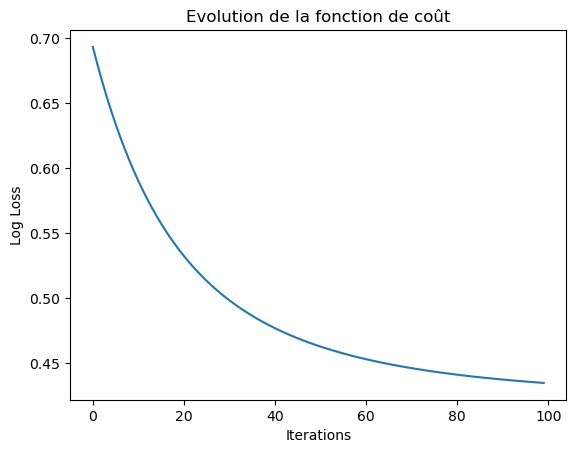

Poids finaux: [1.38218395]


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Générer des données simulées pour la classification binaire
# Ajustement des paramètres pour éviter l'erreur


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# nitialisation des poids
def initialize(X):
    return np.zeros(X.shape[1])

# Modèle de prédiction (fonction sigmoïde)
def model(X, W):
    return 1 / (1 + np.exp(-np.dot(X, W)))

# Fonction de coût (log loss)
def log_loss(A, y):
    epsilon = 1e-15  # pour éviter les erreurs de log(0)
    A = np.clip(A, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))

# Calcul des gradients de la log loss
def gradients(A, X, y):
    return np.dot(X.T, A - y) / len(y)

# Mise à jour des poids
def update(J, W, learning_rate):
    return W - learning_rate * J

# Algorithme du Perceptron avec la log loss
def perceptron(X, y, learning_rate, n_iterations):
    W = initialize(X)
    L = []  # Liste pour stocker la fonction de coût à chaque itération
    for h in range(n_iterations):
        A = model(X, W)  # Prédictions
        L.append(log_loss(A, y))  # Calcul du coût
        J = gradients(A, X, y)  # Calcul des gradients
        W = update(J, W, learning_rate)  # Mise à jour des poids
    plt.plot(L)
    plt.xlabel('Iterations')
    plt.ylabel('Log Loss')
    plt.title('Evolution de la fonction de coût')
    plt.show()
    return W

# Entrainement du modèle
W = perceptron(X_train, y_train, learning_rate=0.1, n_iterations=100)

print("Poids finaux:", W)


In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Générer des données simulées
X, y = make_classification(n_samples=200, n_features=10, n_classes=2, 
                            n_informative=8, n_redundant=2, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Étape 1 : Calcul de l'information mutuelle
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi, index=[f"Feature {i}" for i in range(X.shape[1])])
print("Information Mutuelle des Caractéristiques:\n", mi)

# Étape 2 : Appliquer mRMR
def mrmr_selection(X, y, k):
    """
    Sélectionne k caractéristiques selon la méthode mRMR.
    """
    selected_features = []  # Liste des indices des caractéristiques sélectionnées
    remaining_features = list(range(X.shape[1]))  # Indices des caractéristiques restantes
    relevance = mutual_info_classif(X, y)  # Pertinence des caractéristiques
    
    # Étape 2.1 : Sélectionner la première caractéristique (la plus pertinente)
    first_feature = np.argmax(relevance)
    selected_features.append(first_feature)
    remaining_features.remove(first_feature)
    
    # Étape 2.2 : Sélectionner les k-1 autres caractéristiques
    for _ in range(k - 1):
        max_score = -np.inf
        best_feature = None
        
        for feature in remaining_features:
            # Calculer la pertinence
            relevance_score = relevance[feature]
            
            # Calculer la redondance avec les caractéristiques sélectionnées
            redundancy_score = np.mean([np.corrcoef(X[:, feature], X[:, f])[0, 1] 
                                         for f in selected_features])
            
            # Score mRMR
            mrmr_score = relevance_score - redundancy_score
            if mrmr_score > max_score:
                max_score = mrmr_score
                best_feature = feature
        
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    
    return selected_features

# Sélection des 5 meilleures caractéristiques avec mRMR
selected_features = mrmr_selection(X_train, y_train, k=5)
print("Caractéristiques sélectionnées :", selected_features)

# Étape 3 : Réduction des données à ces caractéristiques
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Étape 4 : Entraîner un réseau de neurones
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
mlp.fit(X_train_selected, y_train)

# Prédictions
y_pred = mlp.predict(X_test_selected)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print("Précision du réseau de neurones :", accuracy)


Information Mutuelle des Caractéristiques:
 Feature 0    0.106312
Feature 1    0.000000
Feature 2    0.008772
Feature 3    0.000000
Feature 4    0.000000
Feature 5    0.077052
Feature 6    0.038585
Feature 7    0.012307
Feature 8    0.025381
Feature 9    0.015830
dtype: float64
Caractéristiques sélectionnées : [0, 7, 9, 6, 3]
Précision du réseau de neurones : 0.65


C:\Users\Unknown\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
y_pred = clf_LR.predict(X)
clf_LR.predict(X)

ValueError: X has 10 features, but LogisticRegression is expecting 1 features as input.

In [ ]:
np.column_stack((y_pred, y))

---

# Logistic Regression Real World Example

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import pandas library

In [28]:
import pandas as pd

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [29]:
train = pd.read_csv('titanic_train.csv')

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

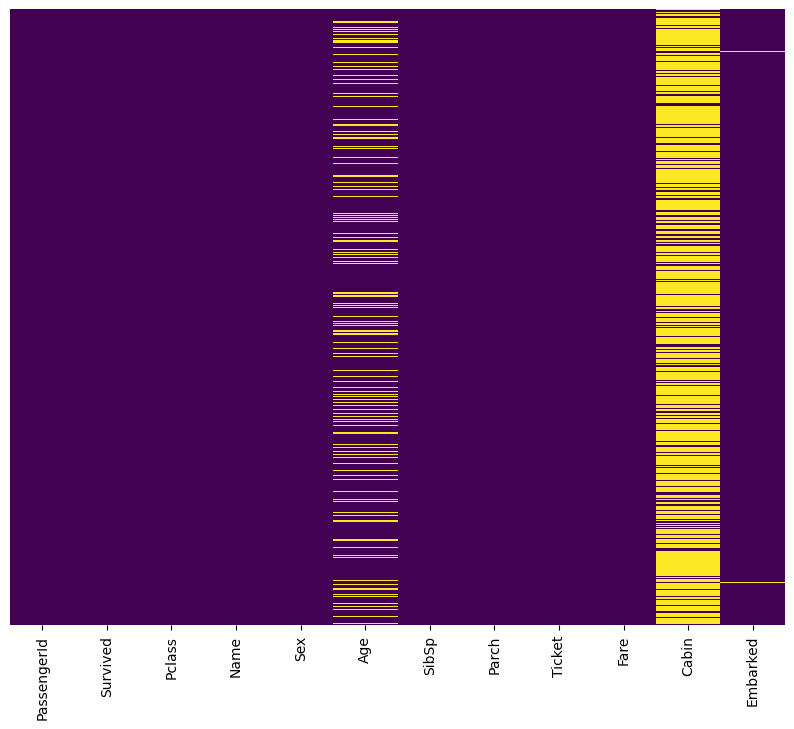

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

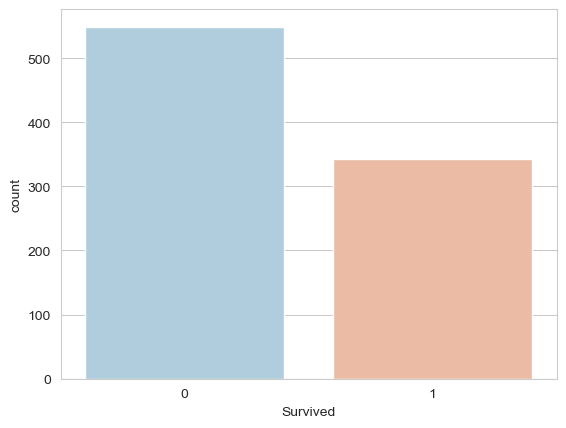

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

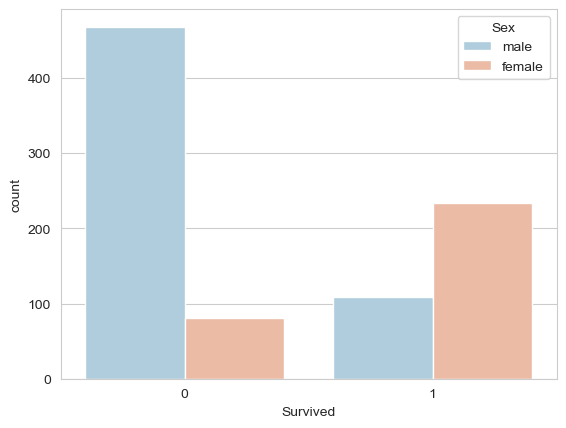

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [34]:
 pip install --upgrade matplotlib seaborn



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [35]:
train['Survived'] = train['Survived'].astype(str)
train['Pclass'] = train['Pclass'].astype(str)

<Axes: xlabel='Survived', ylabel='count'>

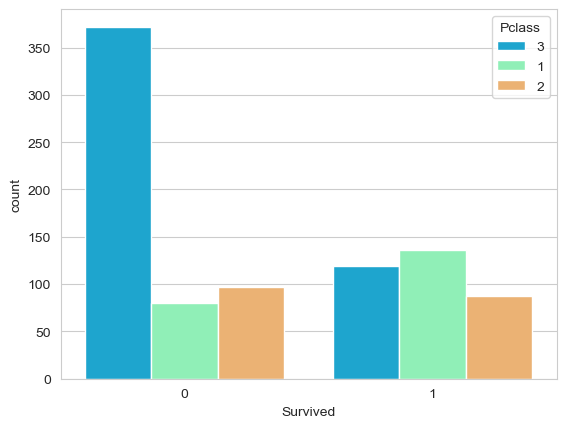

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\Unknown\AppData\Local\Temp\ipykernel_10676\1781747146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

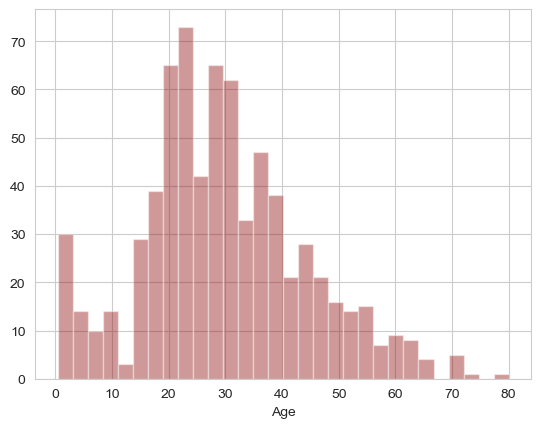

In [37]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

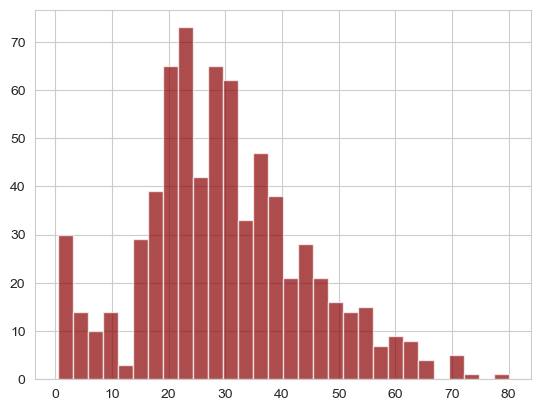

In [38]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

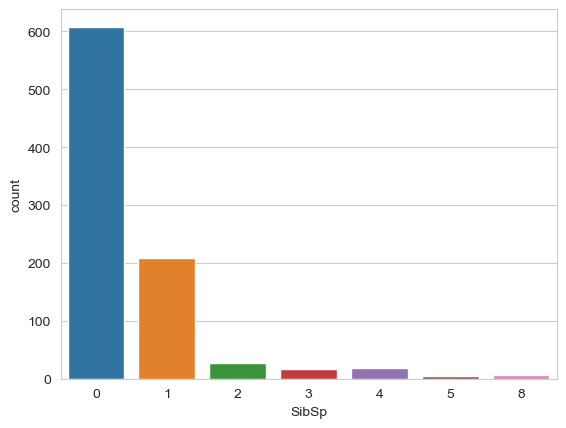

In [39]:
sns.countplot(x='SibSp',data=train)

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
train.info()

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?